In [1]:
%matplotlib inline

import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.constants import golden

In [2]:
ordini = pd.read_csv('Tipo di Acquisti e Ordini.csv', sep=',')

In [3]:
pd.set_option('display.max_rows', ordini.shape[0]+1)
ordini = ordini[["Tipo dato", "Sesso", "Classe di età", "TIME", "Value"]]
ordini

,Tipo dato,Sesso,Classe di età,TIME,Value
0,prodotti alimentari,maschi,20-24 anni,2005,3.8
1,prodotti alimentari,maschi,20-24 anni,2006,4.9
2,prodotti alimentari,maschi,20-24 anni,2007,1.0
3,prodotti alimentari,maschi,20-24 anni,2008,1.8
4,prodotti alimentari,maschi,20-24 anni,2009,2.2
5,prodotti alimentari,maschi,20-24 anni,2010,2.3
6,prodotti alimentari,maschi,20-24 anni,2011,3.0
7,prodotti alimentari,maschi,20-24 anni,2012,3.5
8,prodotti alimentari,maschi,20-24 anni,2013,2.0
9,prodotti alimentari,maschi,20-24 anni,2014,4.7


In [4]:
categorie = ordini["TIME"].drop_duplicates()
anni = categorie.values.tolist()

In [5]:
#Tipologia acquisti giovani (14-24 anni)
df_articoligiovani = ordini[((ordini["Sesso"]=='totale') & ((ordini["Classe di età"]=="14-17 anni")|(ordini["Classe di età"]=="18-19 anni")|(ordini["Classe di età"]=="20-24 anni")))]
df_articoligiovani = df_articoligiovani.groupby("Tipo dato").mean()
df_articoligiovani = df_articoligiovani.drop(columns="TIME")
df_articoligiovani = df_articoligiovani.drop(['altro','altre spese di viaggio per vacanze'])
df_articoligiovani

C:\Users\gabri\AppData\Local\Temp\ipykernel_19996\2779765313.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_articoligiovani = df_articoligiovani.groupby("Tipo dato").mean()


,Value
Tipo dato,
"abiti, articoli sportivi",43.791111
articoli per la casa,10.557778
attrezzature elettroniche,19.297778
"azioni, servizi finanziari e/o assicurativi",0.651111
biglietti per lotterie o scommesse,1.882222
biglietti per spettacoli,15.766667
farmaci,0.517778
"film, musica",21.188889
"giornali, riviste",1.140000


In [6]:
Valori_giovani = df_articoligiovani["Value"].values.tolist()

In [7]:
categorie = df_articoligiovani.index.values.tolist()
categorie

['abiti, articoli sportivi',
 'articoli per la casa',
 'attrezzature elettroniche',
 'azioni, servizi finanziari e/o assicurativi',
 'biglietti per lotterie o scommesse',
 'biglietti per spettacoli',
 'farmaci',
 'film, musica',
 'giornali, riviste',
 'hardware per computer',
 'libri (inclusi e-book)',
 'materiale per la formazione a distanza',
 'pernottamenti per vacanze',
 'prodotti alimentari',
 'servizi di telecomunicazione',
 'software per computer e/o aggiornamenti',
 'videogiochi e/o loro aggiornamenti']

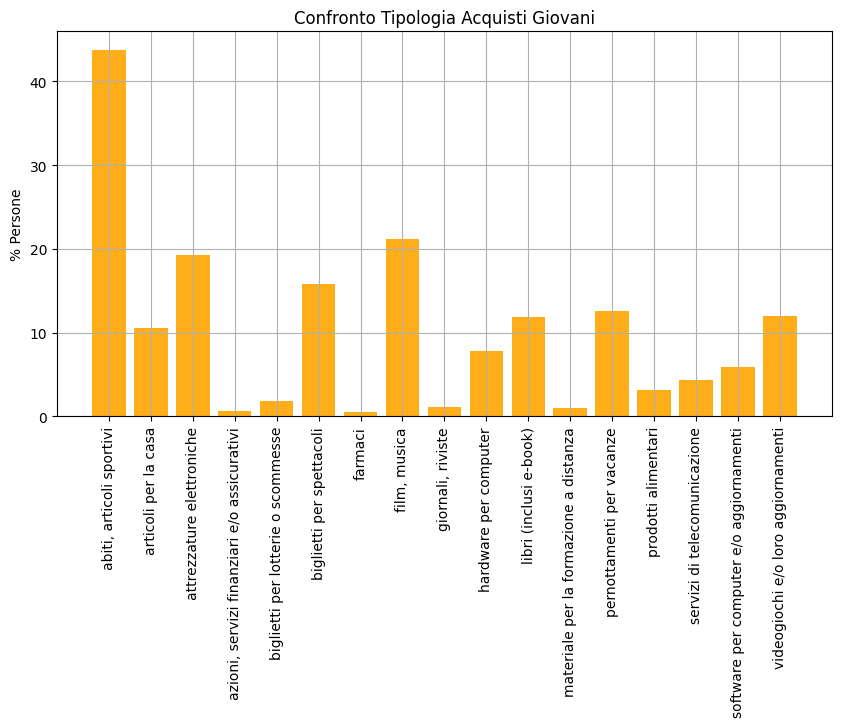

In [8]:
#Confronto Tipologie Acquisti Giovani
labels = categorie
plt.rc('figure', figsize=(10.0, 5.0))
fig, ax = plt.subplots()
width = 0.35 
plt.grid()
ax.bar(labels, Valori_giovani, label='Confronto Tipologia Acquisti Giovani', alpha = 0.9, color = 'orange')

plt.xticks(rotation='vertical')
ax.set_ylabel('% Persone')
ax.set_title('Confronto Tipologia Acquisti Giovani')
plt.show()

In [9]:
#Tipologia acquisti anziani (65 anni e oltre)
df_articolianziani = ordini[((ordini["Sesso"]=='totale') & (ordini["Classe di età"]=="75 anni e più")|(ordini["Classe di età"]=="65-74 anni"))]
df_articolianziani = df_articolianziani.groupby("Tipo dato").mean()
df_articolianziani = df_articolianziani.drop(columns="TIME")
df_articolianziani = df_articolianziani.drop(['altro','altre spese di viaggio per vacanze'])
df_articolianziani

C:\Users\gabri\AppData\Local\Temp\ipykernel_19996\3689077488.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_articolianziani = df_articolianziani.groupby("Tipo dato").mean()


,Value
Tipo dato,
"abiti, articoli sportivi",12.661667
articoli per la casa,22.508333
attrezzature elettroniche,15.070000
"azioni, servizi finanziari e/o assicurativi",6.145000
biglietti per lotterie o scommesse,1.383333
biglietti per spettacoli,14.331667
farmaci,2.755000
"film, musica",8.186667
"giornali, riviste",2.796667


In [10]:
Valori_anziani = df_articolianziani["Value"].values.tolist()

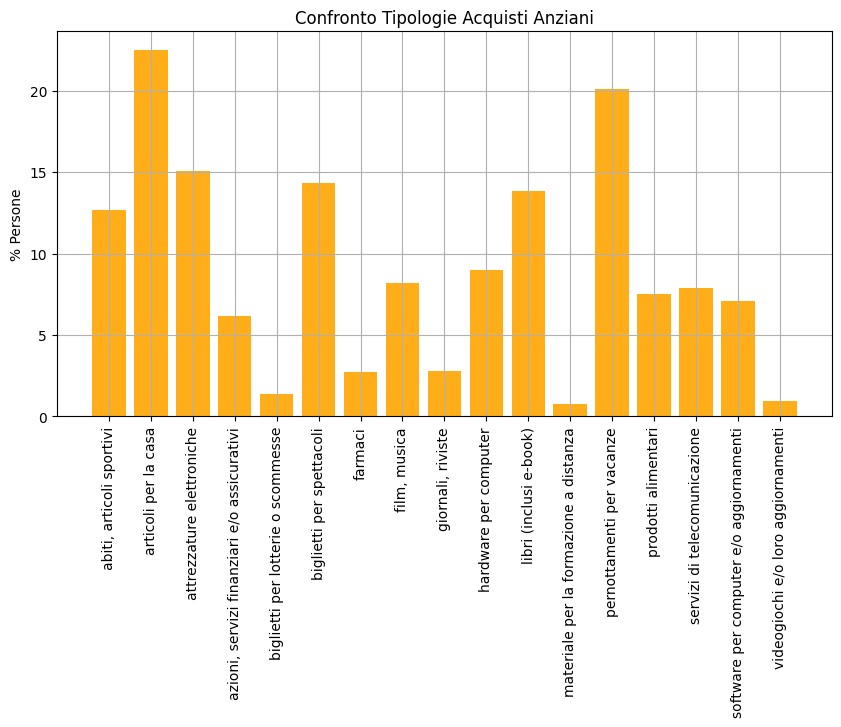

In [11]:
#Confronto Tipologie Acquisti Anziani
labels = categorie

plt.rc('figure', figsize=(10.0, 5.0))
fig, ax = plt.subplots()
width = 0.35 
plt.grid()
ax.bar(labels, Valori_anziani, label='Confronto Tipologie Acquisti Anziani', alpha = 0.9, color = 'orange')
plt.xticks(rotation='vertical')
ax.set_ylabel('% Persone')
ax.set_title('Confronto Tipologie Acquisti Anziani')
plt.show()

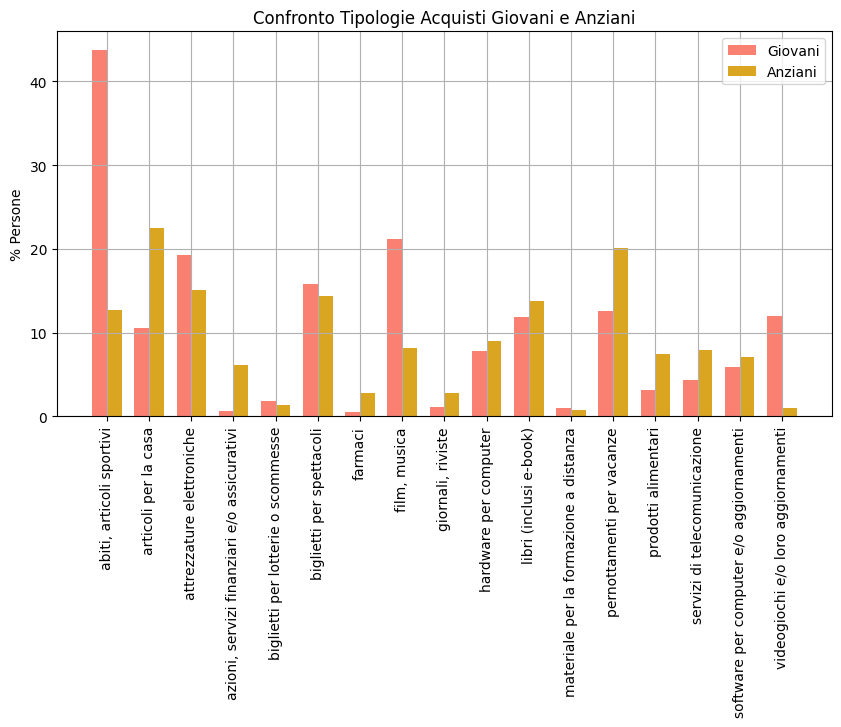

In [12]:
#Confronto Tipologie Acquisti Giovani e Anziani
labels = categorie

plt.rc('figure', figsize=(10.0, 5.0))
fig, ax = plt.subplots()
width = 0.35 
plt.grid()

x = np.arange(len(labels))  # the label locations
ax.bar(x - width/2, Valori_giovani, width, label='Giovani', color = "salmon")
ax.bar(x + width/2, Valori_anziani, width, label='Anziani', color = "goldenrod")
plt.xticks(rotation='vertical')
ax.set_ylabel('% Persone')
ax.set_title('Confronto Tipologie Acquisti Giovani e Anziani')
ax.legend()
ax.set_xticks(x, labels)
plt.show()

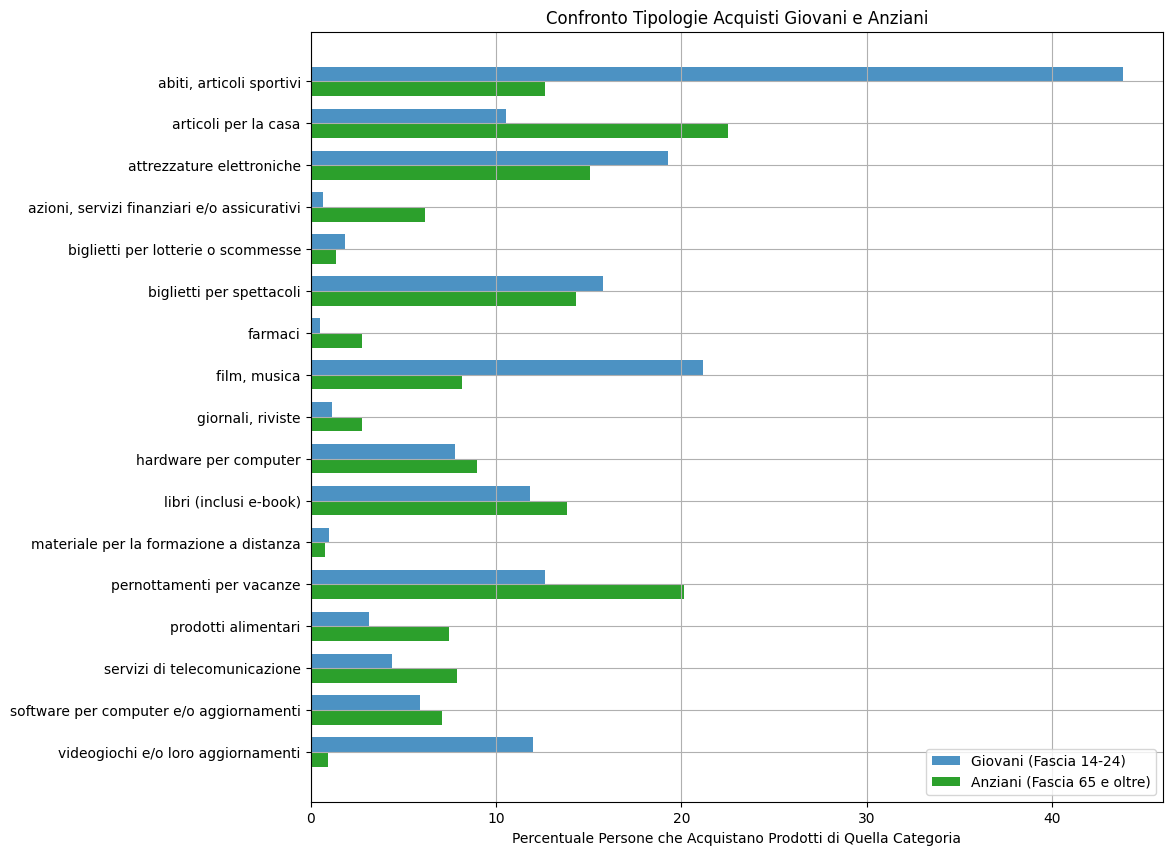

In [19]:
#Confronto Tipologie Acquisti Giovani e Anziani
labels = categorie

plt.rc('figure', figsize=(11.0, 10.0))
fig, ax = plt.subplots()
width = 0.35 
plt.grid()

x = np.arange(len(labels))  # the label locations
ax.barh(x - width/2, Valori_giovani, width, label='Giovani (Fascia 14-24)', color = "tab:blue", alpha=0.8)
ax.barh(x + width/2, Valori_anziani, width, label='Anziani (Fascia 65 e oltre)', color = "tab:green")

ax.set_yticks(x, labels)
ax.set_xlabel('Percentuale Persone che Acquistano Prodotti di Quella Categoria')
ax.set_title('Confronto Tipologie Acquisti Giovani e Anziani')
ax.invert_yaxis()
ax.legend()
plt.show()